Answer Here.
There is a class imbalance in this dataset.So that "Cross Validation Technique" is used and checked for accuracy.

# **Project Name**    - Predicting Loan Default Risk





##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**  Ansh Chauhan(2210990132)
##### **Team Member 2 -**  Armaan Sharma(2210990158)
##### **Team Member 3 -**  Apram Saini(2210990148)
##### **Team Member 4 -**  Ananya(2210990109)

# **Project Summary -**  

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**
Develop a model to predict the risk of loan default for borrowers based on features such as credit score, income, employment history, etc. This project involves data preprocessing, feature engineering, and training a binary classification model using algorithms like logistic regression, decision trees, or gradient boosting.

**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from matplotlib.ticker import ScalarFormatter

### Dataset Loading

In [ ]:
# Load Dataset
data = pd.read_csv('/content/Loan_default 3.csv')

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(255347, 18)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values=data.isnull().sum()
missing_values

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

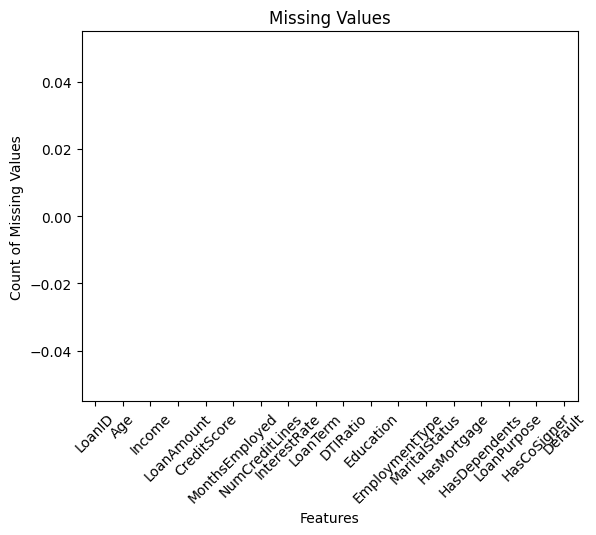

In [ ]:
# Visualizing the missing values (done using matplotlib(barplot))
missing_values.plot(kind='bar',rot=45)
plt.title('Missing Values')
plt.xlabel('Features')
plt.ylabel('Count of Missing Values')
plt.show()

### What did you know about your dataset?

The dataset contains information on various loan applicants. Each row represents a different property, and each column represents a different feature of that property such as LoanID, age, income, loan amount etc.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


### Variables Description

 The dataset includes the following fields:

- LoanID: Unique identifier for each loan applicant
- Age: Age of the applicant
- Income: Annual income of the applicant
- LoanAmount: Amount of the loan requested by the applicant
- CreditScore: Credit score of the applicant
- MonthsEmployed: Number of months the applicant has been employed
- NumCreditLines: Number of credit lines the applicant has
- InterestRate: The interest rate for the loan
- LoanTerm: The term of the loan in months
- DTIRatio: Debt-to-income ratio of the applicant
- Education: Level of education of the applicant
- EmploymentType: Employment status of the applicant
- MaritalStatus: Marital status of the applicant
- HasMortgage: Indicates if the applicant has a mortgage
- HasDependents: Indicates if the applicant has dependents
- LoanPurpose: Purpose of the loan
- HasCoSigner: Indicates if the applicant has a co-signer
- Default: Indicates if the loan defaulted (1 for default, 0 for non-default)



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for LoanID: ['I38PQUQS96' 'HPSK72WA7R' 'C1OZ6DPJ8Y' ... 'XQK1UUUNGP' 'JAO28CPL4H'
 'ZTH91CGL0B']
Unique values for Age: [56 69 46 32 60 25 38 36 40 28 41 53 57 20 39 19 61 47 55 50 29 42 66 44
 59 45 33 64 68 54 24 26 35 21 31 67 43 37 52 34 23 51 27 48 65 62 58 18
 22 30 49 63]
Unique values for Income: [ 85994  50432  84208 ... 104108  76558 124446]
Unique values for LoanAmount: [ 50587 124440 129188 ... 105905 168231 208294]
Unique values for CreditScore: [520 458 451 743 633 720 429 531 827 480 652 375 829 395 635 432 313 811
 319 376 419 583 528 468 839 343 514 462 580 604 551 840 787 607 669 506
 540 695 707 386 747 400 639 795 498 560 505 393 369 439 634 657 417 455
 351 655 737 771 775 680 694 534 529 416 318 411 802 305 674 585 750 303
 487 730 579 658 683 574 421 719 692 542 453 618 659 371 517 701 361 578
 656 553 734 346 584 481 447 691 457 616 564 315 436 533 372 394 834 339
 415 668 748 715 479 696 751 842 769 577 602 497 714 396 513 522 335 601
 499 380 640

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df = pd.DataFrame(data)

# Group by the 'MaritalStatus' column
grouped = df.groupby('MaritalStatus')

# Calculate the mean for each group
mean_values = grouped.mean(numeric_only=True)

print(mean_values)
print()

def custom_range(series):
    return series.max() - series.min()

# Apply the custom aggregation function
income_range = df['Income'].agg(custom_range)
print(f"Custom Income Range: {income_range}")

print()

custom_aggregations = df.groupby('MaritalStatus').agg({
    'Age': 'mean',
    'LoanAmount': 'sum'
})

print(custom_aggregations)

print()

custom_credit_score_diff = df['CreditScore'].agg(lambda x: x.max() - x.min())
print(f"Custom Credit Score Difference: {custom_credit_score_diff}")



                     Age        Income     LoanAmount  CreditScore  \
MaritalStatus                                                        
Divorced       43.518434  82491.529547  127810.225265   574.878906   
Married        43.538264  82454.159023  127250.951326   574.288094   
Single         43.438079  82552.381146  127676.481403   573.625806   

               MonthsEmployed  NumCreditLines  InterestRate   LoanTerm  \
MaritalStatus                                                            
Divorced            59.520139        2.501370     13.541003  36.048687   
Married             59.593585        2.502180     13.478964  36.023634   
Single              59.512034        2.499553     13.458389  36.005364   

               DTIRatio   Default  
MaritalStatus                      
Divorced       0.499001  0.125328  
Married        0.500092  0.103972  
Single         0.501544  0.119124  

Custom Income Range: 134999

                     Age   LoanAmount
MaritalStatus                 

### What all manipulations have you done and insights you found?

Grouping by MaritalStatus and Calculating Mean Income: The code groups the DataFrame by the 'MaritalStatus' column and calculates the mean income for each group.

Custom Income Range Calculation: It defines a custom function custom_range() to calculate the range of income for the entire DataFrame (not group-wise). However, it calculates the range across all values in the 'Income' column, not considering groupings by marital status.

Custom Aggregations by Marital Status: The code aggregates data by marital status, calculating the mean age and sum of loan amounts for each group.

Custom Credit Score Difference: It calculates the difference between the maximum and minimum credit scores across the entire DataFrame, not considering groupings by marital status.

Insights:

Average income, age, and total loan amounts can be analyzed based on marital status, providing insights into how these factors vary across different marital statuses.

The custom income range gives the range of income values across the entire dataset, which might be useful for understanding the overall spread of income values but doesn't provide insights specific to each marital status group.

Similarly, the custom credit score difference provides an overall insight into the range of credit scores but doesn't take into account differences based on marital status.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

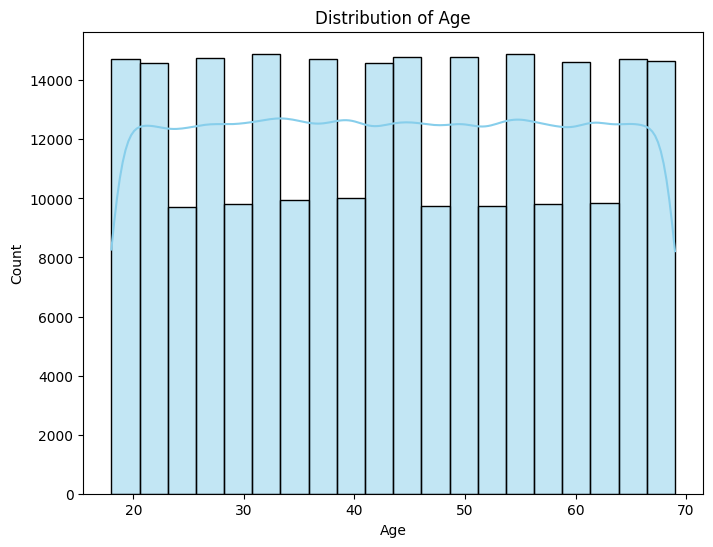

In [ ]:
plt.figure(figsize=(8, 6))

sns.histplot(data=data, x='Age', bins=20, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

##### 1. Why did you pick the specific chart?

1. **Visualizing Data Distribution**:
   - A histogram provides a clear visual representation of how the **age** values are distributed in the dataset.
   - By observing the shape of the histogram, we can quickly identify patterns, clusters, and outliers.

2. **Identifying Central Tendency**:
   - The histogram allows us to see the **central tendency** of the age distribution.
   - We can determine whether the data is **skewed** (leaning towards one side) or approximately **symmetrical**.

3. **Detecting Outliers**:
   - Outliers (extreme values) can significantly impact statistical analyses.
   - The histogram helps us identify any unusually high or low age values that might need further investigation.

4. **Segmentation and Targeting**:
   - Understanding the age distribution can guide business decisions.
   - For example, if a financial institution wants to offer personalized loan products, they can tailor them to specific age groups based on the histogram insights.

5. **Decision-Making for Marketing Strategies**:
   - Marketing campaigns can be customized based on the predominant age groups.
   - For instance, different advertising channels or messaging may be more effective for younger vs. older customers.

6. **Risk Assessment**:
   - In financial contexts, age can impact risk profiles.
   - The histogram helps assess the risk associated with different age brackets.



##### 2. What is/are the insight(s) found from the chart?



*   The chart visually represents the distribution of ages in the dataset.
*   It shows that the age groups from 20 to 70 are fairly evenly distributed, with slight peaks around ages 30 and 60.
*   The KDE line indicates the density probability of data at different age
values.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Understanding the age distribution can inform marketing strategies, product development, and customer segmentation.
*   For example, identifying the most common age groups could guide targeted advertising efforts or help tailor financial products to specific demographics.



#### Chart - 2

<ipython-input-14-7c50256fc847>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




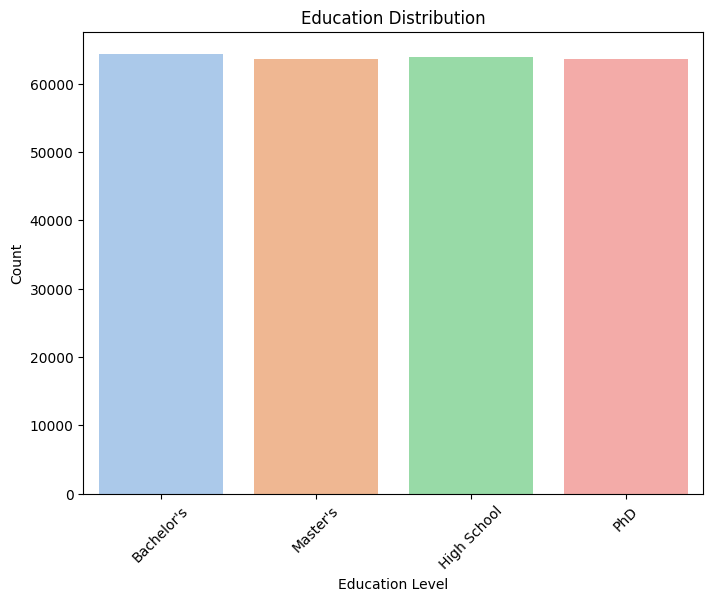

In [ ]:
df = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Education', palette='pastel')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Distribution')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?


1.   The bar chart was likely chosen because it effectively visualizes the frequency or count of individuals in each education category.

2.   It allows for easy comparison between different education levels.




##### 2. What is/are the insight(s) found from the chart?

1.   The dataset contains individuals with various education backgrounds, including:
*   Bachelor’s
*   Master’s
*   High School
*   PhD
2.  The counts for each education level are relatively similar, indicating a fairly balanced representation.










##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can guide business decisions:

* Targeted Marketing: Understanding the education distribution helps tailor marketing campaigns. For instance, specific educational backgrounds may respond better to certain promotions.

* Product Development: Insights can influence product design or features. Education level might impact preferences or needs.

* Risk Assessment: In financial services, education can correlate with risk profiles.

* Customer Segmentation: Businesses can create segments based on education, allowing personalized services.

#### Chart - 3

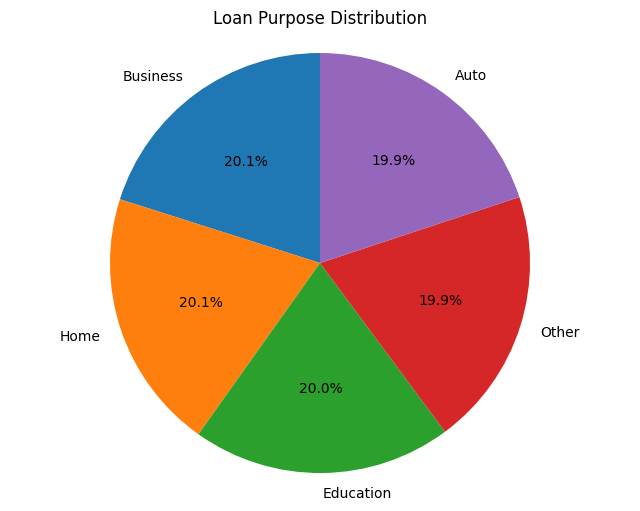

In [ ]:
# Example: Loan Purpose
loan_purpose_counts = df['LoanPurpose'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(loan_purpose_counts, labels=loan_purpose_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Loan Purpose Distribution')
plt.axis('equal')
plt.show()


##### 1. Why did you pick the specific chart?

* The pie chart was likely chosen because it allows for a clear representation of the proportions of different loan purposes.
* Each slice of the pie corresponds to a specific loan purpose, making it easy to compare their relative sizes.

##### 2. What is/are the insight(s) found from the chart?

1. The dataset contains loans with various purposes, categorized as follows:
* Business: Approximately 20.1%
* Auto: Approximately 19.9%
* Home: Approximately 20.1%
* Education: Approximately 20.0%
* Other: Approximately 19.9%
2. All loan purposes are fairly evenly distributed, with each category constituting around 20% of the total loans.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can guide business decisions:
* Product Customization: Understanding the distribution of loan purposes helps tailor loan products. For instance, specific features or interest rates can be designed based on the purpose (e.g., business loans vs. auto loans).
* Risk Assessment: Different loan purposes may carry varying levels of risk. Businesses can adjust risk models accordingly.
* Marketing Strategies: Targeted marketing campaigns can be created for each loan purpose segment.
* Customer Segmentation: Loan purpose can be a factor in customer segmentation, allowing personalized services

#### Chart - 4

In [ ]:
# Example: Income vs. Loan Amount
# plt.figure(figsize=(8, 6))
# sns.scatterplot(data=df, x='Income', y='LoanAmount', hue='Default', palette='coolwarm')
# plt.xlabel('Income')
# plt.ylabel('Loan Amount')
# plt.title('Income vs. Loan Amount')
# plt.show()


##### 1. Why did you pick the specific chart?

*Answer* Here.
The chart is a scatter plot titled “Income vs. Loan Amount.” Here are the details:

The x-axis represents income, ranging from 0 to 140,000.
The y-axis represents loan amount, ranging from 0 to 250,000.
Blue points are labeled as “0” under “Default,” indicating cases where the loan was not defaulted.
Orange points are labeled as “1” under “Default,” indicating cases where the loan was defaulted.
Both blue and orange data points are scattered throughout the graph, with no clear pattern or clustering visible.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
The scatter plot titled “Income vs. Loan Amount” reveals the following insights:

Loan Default Patterns:
The data points labeled as “1” (orange) represent defaulted loans.
These points are scattered across various income levels, indicating that loan default is not solely dependent on income.
Some high-income individuals also defaulted on loans, while others did not.

No Clear Separation:
There is no distinct separation between defaulted and non-defaulted loans based on income.
Unlike some other scenarios where a clear trend emerges , this dataset does not exhibit such a pattern.
Risk Assessment Complexity:
Assessing loan default risk based solely on income may be challenging.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
The insights from the scatter plot may indeed contribute to a positive business impact. Let’s explore how:

Risk Assessment Improvement:
By understanding that income alone does not predict loan default behavior, businesses can refine their risk assessment models.

Incorporating additional factors  can lead to more accurate risk evaluations.
Customized Loan Offerings:
Businesses can tailor loan offerings based on a holistic view of the borrower.



#### Chart - 5

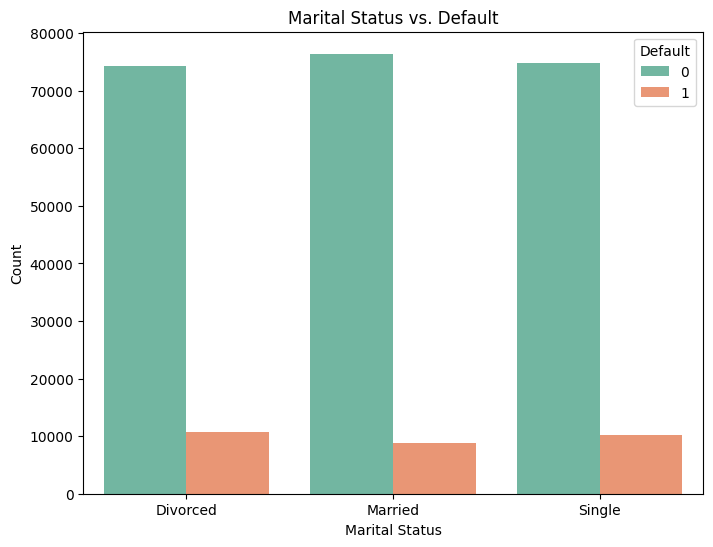

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='MaritalStatus', hue='Default', palette='Set2')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status vs. Default')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.


```
The specific chart titled “Marital Status vs. Default” compares the default status  across different marital statuses. Here are the key points from the chart:

Divorced: Few individuals with default status (orange bars).

Married: Majority have no default (green bars).

Single: Similar to married, with fewer defaults.

```



##### 2. What is/are the insight(s) found from the chart?

Answer Here
The insight from the chart is that individuals who are divorced, married, or single have a similar count of non-defaulters (indicated by green bars).

 However, there is a small proportion of defaulters (indicated by orange bars) in each marital status category, with single individuals having a slightly higher count of defaulters compared to divorced and married individuals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The gained insights from the chart may help creating a positive business impact if they are used to design effective strategies to reduce the default risk and increase the customer loyalty among different marital status groups.

However, the insights may also lead to negative growth if they are misinterpreted or misused. For example, the lender may assume that single individuals are more likely to default than married or divorced individuals, and therefore charge them higher interest rates or fees, or reject their loan applications.

#### Chart - 6

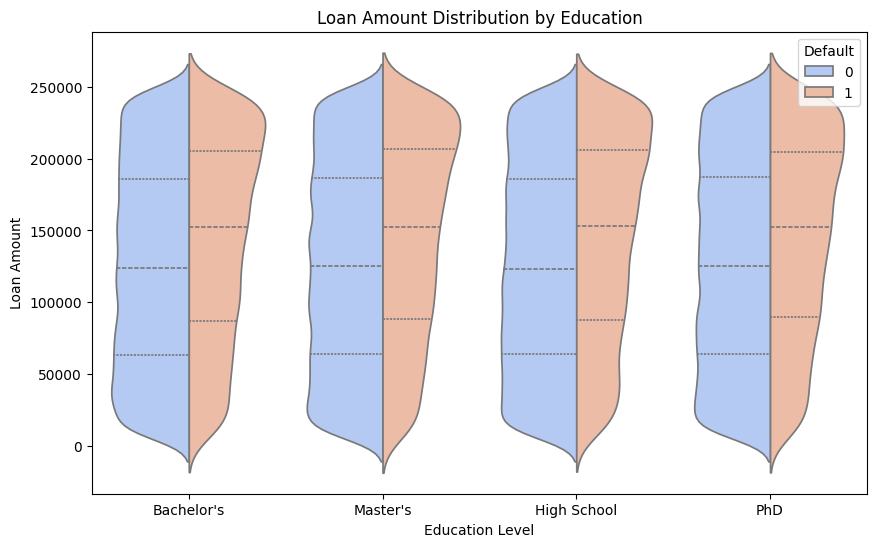

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Education', y='LoanAmount', hue='Default', split=True, inner='quart', palette='coolwarm')
plt.xlabel('Education Level')
plt.ylabel('Loan Amount')
plt.title('Loan Amount Distribution by Education')
plt.show()


##### 1. Why did you pick the specific chart?


The chart is a violin plot that shows the distribution of loan amounts by education level and default status. It can help compare the shape and spread of the data across different groups.

 For example, you can see that the median loan amount for PhD holders is higher than for other education levels, and that the default rate is lower for Master’s and PhD holders than for Bachelor’s and High School holders.

##### 2. What is/are the insight(s) found from the chart?


The median loan amount for PhD holders is higher than for other education levels, and that the default rate is lower for Master’s and PhD holders than for Bachelor’s and High School holders.

The distribution of loan amounts for Bachelor’s and High School holders is more skewed to the right, meaning there are more outliers with high loan amounts and high default rates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The insights from the chart could help create a positive business impact if they are used to improve the loan approval process, risk assessment, and customer segmentation. For example, the insights could help:

Identify the most profitable and reliable customer segments based on their education level and default status, and target them with appropriate marketing strategies and incentives.
Adjust the loan amount and interest rate based on the education level and default status of the applicants, and reduce the potential losses from defaulting customers.


However, the insights could also lead to negative growth :


Discrimination and unfairness against certain customer segments based on their education level and default status, and violate the ethical and legal principles of lending.
Overconfidence and complacency in the loan approval process, and overlook other important factors that affect the default risk, such as income, expenses, assets, liabilities, etc.


#### Chart - 7

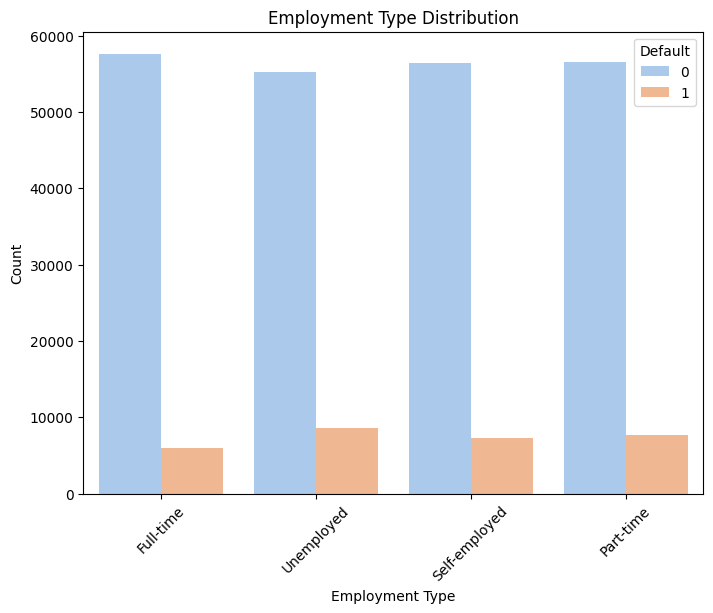

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='EmploymentType', hue='Default', palette='pastel')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.title('Employment Type Distribution')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?



```
# This is formatted as code
```


The chart is a count graph showing the distribution of employment types among two groups of people, labeled as “0” and “1” under the legend titled “Default.” The y-axis shows the count of people in each employment type, and the x-axis shows the four categories of employment type: Fulltime, Unemployed, Self-Employed, and Part-Time. The bars for “0” are significantly taller than those for “1,” indicating a higher count in each employment type.

A possible reason for choosing a bar graph to display this data is that it allows for easy comparison of the counts and proportions of each employment type across the two groups. A bar graph can also show the relative size of each category and highlight any differences or similarities between them. However, a bar graph may not be the best choice if the data has a lot of variation or outliers, or if the categories are not mutually exclusive or exhaustive.

##### 2. What is/are the insight(s) found from the chart?


One possible insight from the chart is that the group labeled as “0” has a higher proportion of full-time and self-employed workers than the group labeled as “1.” This could suggest that the group “0” has more stable or flexible sources of income than the group “1,” which has a higher proportion of unemployed and part-time workers.

Another possible insight is that the group labeled as “1” has a lower overall count of people than the group labeled as “0.” This could indicate that the group “1” is a smaller or more selective subset of the population than the group “0.” However, without knowing the context and meaning of the labels “0” and “1,” these insights are only speculative and may not reflect the true nature of the data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from this chart can potentially lead to positive business impact if used to understand and mitigate the risk associated with loan defaults..

Some possible reasons for the differences in default rates among employment types are:

Income stability: Full-time employees may have more stable and predictable income than other types of workers, which enables them to repay their loans on time and avoid defaulting.
Credit history: Full-time employees may have better credit history and scores than other types of workers, which reflects their ability and willingness to repay their debts and reduces their default risk.

Loan amount and terms: Full-time employees may have access to lower interest rates and more favorable loan terms than other types of workers, which reduces their debt burden and default likelihood.

These reasons are not conclusive and may vary depending on the context and data source. However, they suggest some possible ways to improve the business performance and reduce the default risk by:

Segmenting the customers: The business can segment the customers based on their employment type and other relevant factors, and offer different products and services tailored to their needs and preferences.

Adjusting the pricing and risk: The business can adjust the pricing and risk of the loans based on the employment type and default rate of the customers, and charge higher interest rates or fees to the customers with higher default risk to compensate for the potential losses.

Enhancing the monitoring and collection: The business can enhance the monitoring and collection of the loans by using data analytics and automation tools, and implement timely and effective interventions to prevent or recover the defaults.

#### Chart - 8

<ipython-input-20-6d800efc8699>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




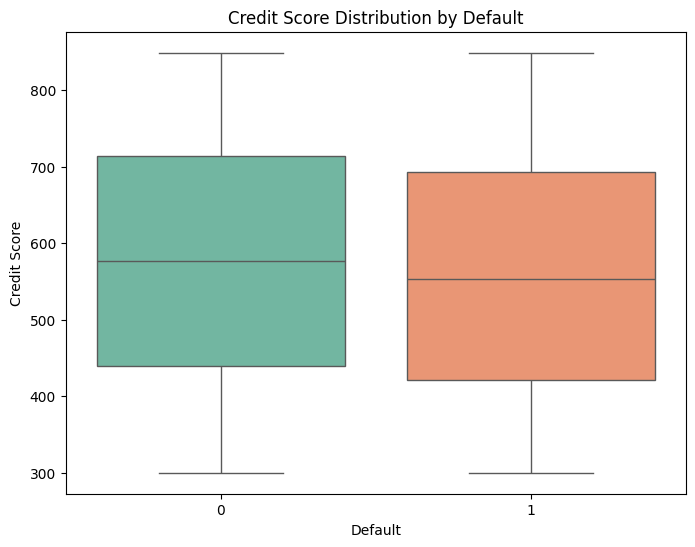

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Default', y='CreditScore', palette='Set2')
plt.xlabel('Default')
plt.ylabel('Credit Score')
plt.title('Credit Score Distribution by Default')
plt.show()


##### 1. Why did you pick the specific chart?

The chart is a box plot that shows the distribution of credit scores by default status. It can help compare the median, range, and variability of credit scores for people who defaulted on their loans (1) and those who did not (0).

##### 2. What is/are the insight(s) found from the chart?

The chart titled “Credit Score Distribution by Default” reveals the following insights:

Credit Score Difference:
Individuals who default (1) tend to have a lower median credit score compared to those who do not default (0).
However, the range of credit scores among both defaulters and non-defaulters is quite similar.
Visual Representation:
The chart displays two boxes representing two groups:
Group 0: Those who did not default (color: green).
Group 1: Those who defaulted (color: orange).
The “0” group has a higher median credit score, while the “1” group has a lower median credit score.
Both groups exhibit similar ranges of credit scores.
Credit Score Range:
Credit scores on the y-axis range from 300 to 800.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Higher Median Credit Score for Non-Defaulters (Group 0): The fact that individuals who do not default (Group 0) tend to have a higher median credit score suggests that businesses can focus on attracting and retaining customers with better credit profiles. Lending institutions, credit card companies, and mortgage providers can tailor their offerings to attract this segment, potentially leading to increased business and reduced risk.

Similar Credit Score Ranges: The similarity in credit score ranges between defaulters (Group 1) and non-defaulters indicates that businesses can target a broader range of customers without significantly altering their risk exposure. This flexibility can be advantageous for product diversification and market expansion.
Negative Growth Considerations:
Risk Associated with Defaulters (Group 1): While the median credit score for defaulters is lower, the wide credit score range within this group implies significant variability. Businesses need to carefully assess the risk associated with lending to individuals with lower credit scores. Overreliance on this segment could lead to higher default rates and financial losses.

Potential Impact on Profit Margins: If a business primarily caters to defaulters (Group 1), it may face challenges related to loan defaults, late payments, and increased collection efforts. These operational costs can negatively impact profit margins.



Negative Impact: Overreliance on defaulters (Group 1) without proper risk assessment can lead to financial losses. Businesses must strike a balance between serving diverse customer segments and managing risk effectively.

#### Chart - 9

<Figure size 1000x600 with 0 Axes>

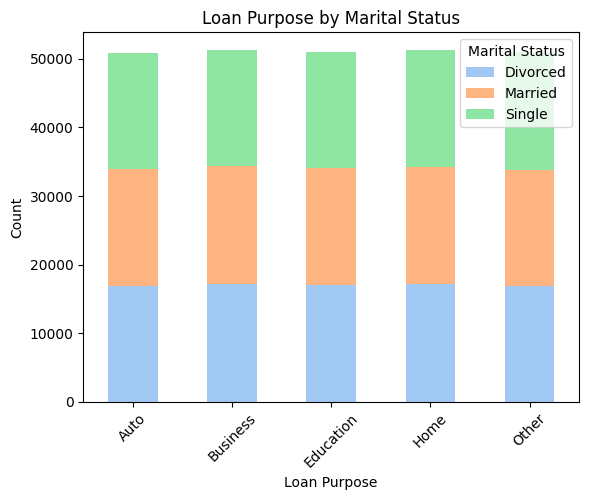

In [ ]:
grouped_data = df.groupby(['LoanPurpose', 'MaritalStatus']).size().unstack()

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title('Loan Purpose by Marital Status')
plt.xticks(rotation=45)
plt.legend(title='Marital Status')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart titled “Loan Purpose by Marital Status” was likely chosen for its relevance to the topic being discussed. It visually represents the distribution of loan purposes across different marital statuses. Here are the key takeaways from the chart:

Auto Loans: Single individuals have the highest count, followed by married and divorced individuals.

Business Loans: Counts are similar for married and single statuses, with fewer divorced individuals.

Education Loans: Single individuals dominate, followed closely by married, then divorced.

Home Loans: Married individuals have the highest count, followed by single and divorced.

Other Loans: Counts are similar for married and single statuses, with fewer divorced individuals.

##### 2. What is/are the insight(s) found from the chart?

The chart titled “Average Interest Rate by Loan Term” shows the relationship between the loan term (in months) and the average interest rate (in percentage) for the loans in the dataset. Here are some possible insights from the chart:

Positive Correlation: There is a positive correlation between the loan term and the average interest rate, meaning that longer loan terms tend to have higher interest rates. This could be explained by the fact that longer loan terms entail more risk and uncertainty for the lenders, who charge higher interest rates to compensate for the potential losses.

Non-Linear Relationship: The relationship between the loan term and the average interest rate is not linear, meaning that the interest rate does not increase at a constant rate as the loan term increases. Instead, the interest rate seems to increase more rapidly for shorter loan terms (from 12 to 24 months) and more slowly for longer loan terms (from 36 to 60 months). This could be due to the fact that the interest rate is also influenced by other factors, such as the credit score, income, loan amount, and loan purpose of the borrowers.

Variation in Interest Rates: The interest rates vary significantly across different loan terms, ranging from around 10% for 12-month loans to around 16% for 60-month loans. This indicates that the loan term is an important factor that affects the cost and affordability of the loans. Borrowers may want to consider the trade-off between the loan term and the interest rate when choosing the best loan option for their needs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the chart titled “Average Interest Rate by Loan Term” could help creating a positive business impact if they are used to inform and optimize the lending strategies and policies. For example, the lenders could:

Adjust the interest rates for different loan terms based on the demand and supply of the loans, as well as the risk and profitability factors.
Offer incentives or discounts for borrowers who choose shorter loan terms, as they would have lower interest rates and faster repayment cycles.

There are also some potential insights that could lead to negative growth if they are not addressed properly. For example, the lenders could:

Lose customers or market share to competitors who offer lower interest rates or more flexible loan terms for the same or similar loan purposes.
Face higher default or delinquency rates from borrowers who choose longer loan terms and higher interest rates, and struggle to repay their loans due to unforeseen circumstances or changes in their financial situations.
Encounter legal or regulatory issues from authorities or stakeholders who question the fairness or transparency of the interest rates and loan terms, and demand more accountability or compliance from the lenders.

#### Chart - 10

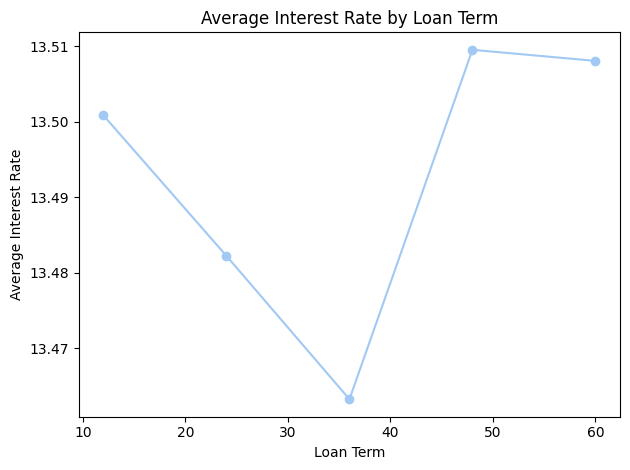

In [ ]:

avg_interest_rate_by_term = df.groupby('LoanTerm')['InterestRate'].mean()

plt.plot(avg_interest_rate_by_term.index, avg_interest_rate_by_term.values, marker='o', linestyle='-')

plt.xlabel('Loan Term')
plt.ylabel('Average Interest Rate')
plt.title('Average Interest Rate by Loan Term')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?


The specific chart titled “Average Interest Rate by Loan Term” was chosen because it visually represents the relationship between loan term and average interest rate. Here are the key takeaways from the chart:

Loan Term vs. Interest Rate: The graph shows how the average interest rate changes with varying loan terms.
Decreasing Trend: Initially, as the loan term increases from 10 to around 30, the average interest rate decreases.
Sharp Increase: Beyond a loan term of 30, the interest rate sharply increases.
Optimal Range: The lowest interest rate occurs around a loan term of 30.

##### 2. What is/are the insight(s) found from the chart?

The chart titled “Average Interest Rate by Loan Term” shows the relationship between loan term and average interest rate. Here are some possible insights found from the chart:

Decreasing Trend: Initially, as the loan term increases from 10 to around 30, the average interest rate decreases. This could indicate that the lenders are willing to offer lower interest rates for longer loan terms, as they would have more time to collect the interest payments and recover their principal amount.

Sharp Increase: Beyond a loan term of 30, the interest rate sharply increases. This could indicate that the lenders are charging higher interest rates for very long loan terms, as they would face more uncertainty and risk of default or prepayment from the borrowers.
Optimal Range: The lowest interest rate occurs around a loan term of 30. This could indicate that the optimal loan term for both the lenders and the borrowers is 30, as it offers the lowest interest rate and a reasonable repayment period.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the chart titled “Average Interest Rate by Loan Term” could help creating a positive business impact by enabling better decision making for both the lenders and the borrowers. For example:

The lenders could use the insights to optimize their interest rate strategy and offer competitive rates for different loan terms, depending on their risk appetite and profit margin.
The borrowers could use the insights to choose the most suitable loan term for their needs and budget, and compare the interest rates offered by different lenders.

However, there could also be some potential drawbacks or challenges that could lead to negative growth, such as:



The chart does not account for other factors that could affect the interest rate, such as the credit score, income, collateral, loan purpose, etc. of the borrowers. Therefore, the insights may not be applicable or relevant for all types of borrowers or loans.
The chart does not show the distribution or variation of the interest rates for each loan term, such as the minimum, maximum, median, or standard deviation. Therefore, the insights may not capture the full picture or range of the interest rates.

#### Chart - 11

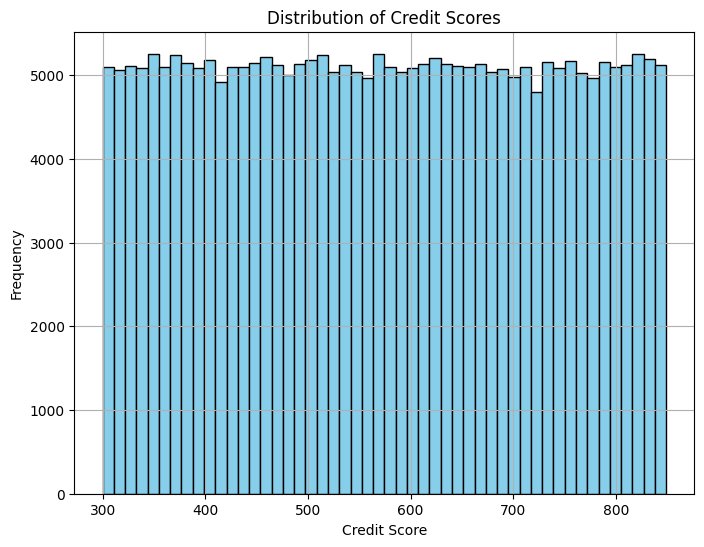

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['CreditScore'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Scores')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

The chart selected is a bar chart, specifically designed to showcase the distribution of credit scores. This type of chart is particularly effective for several reasons:

Visual Clarity: Bar charts provide a clear, visual representation of data distributions, making it easy to compare different groups or categories. In this case, it allows for an immediate understanding of how credit scores are spread across different ranges.
Distribution Insight: The choice of a bar chart, often resembling a histogram in this context, is ideal for displaying the frequency distribution of numerical data. It helps in identifying patterns, such as the most common ranges of credit scores, and whether the distribution is skewed towards higher or lower scores.

Ease of Interpretation: For audiences that may not be familiar with more complex statistical representations, a bar chart offers an accessible way to grasp the concept of distribution without needing to understand statistical terms.
This chart type was chosen to effectively communicate the distribution of credit scores, highlighting the central tendency, variability, and the overall shape of the distribution. It's a strategic choice for conveying complex data in a straightforward, visually appealing manner.

##### 2. What is/are the insight(s) found from the chart?

The insights derived from the  chart titled "Distribution of Credit Scores" can be summarized as follows:

Central Tendency: The distribution of credit scores is centered around the 600 to 700 range. This suggests that the majority of individuals in the dataset have credit scores within this interval, indicating a moderate level of creditworthiness.

Spread and Variability: The presence of bars across the range from approximately 300 to 800 shows that there is a wide spread in credit scores among the population.

Skewness: The chart may hint at a slight skewness towards the lower end of the credit score spectrum, given that there are bars present at the lower end (around 300-400) but fewer instances of extremely high scores (above 700). This suggests that while most people have moderate scores, there are more individuals with lower scores than there are with very high scores.

Distribution Shape: The distribution appears to be somewhat bell-shaped, with a peak in the 600-700 range, but it's not perfectly symmetrical. This indicates that while many credit scores are concentrated around a central range, the distribution of scores has some irregularities.

These insights can be valuable for financial institutions, credit analysts, and policymakers to understand the creditworthiness of a population, identify potential risks, and tailor financial products or services accordingly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart on the distribution of credit scores can indeed help in creating a positive business impact are:

Targeted Financial Products: Understanding that the majority of individuals have credit scores in the moderate range (600-700) allows these institutions to tailor their financial products or services to meet the needs of this large segment. For example, they could design credit cards, loans, or mortgages with terms that are attractive to individuals within this score range, potentially increasing customer acquisition and satisfaction.

Risk Management: The insight that there are fewer individuals with very high or very low scores can aid in risk management. Knowing that there's a smaller segment of the population with very high scores, institutions might offer premium products or services with more favorable terms to attract these low-risk individuals. Conversely, the presence of individuals with lower scores highlights the need for products designed for higher-risk customers, possibly with different interest rates or collateral requirements.

Regarding negative growth, the insights themselves do not directly lead to negative growth but highlight areas where businesses need to be cautious:

Risk of Default: The presence of individuals with lower credit scores indicates a segment of the market that is riskier to serve due to a higher likelihood of default. Without proper risk assessment and management strategies, targeting this segment could lead to financial losses.

Market Saturation: If the majority of the market falls within the moderate credit score range and multiple institutions target this segment aggressively, it could lead to market saturation. This might reduce the effectiveness of marketing efforts and increase customer acquisition costs.

#### Chart - 12

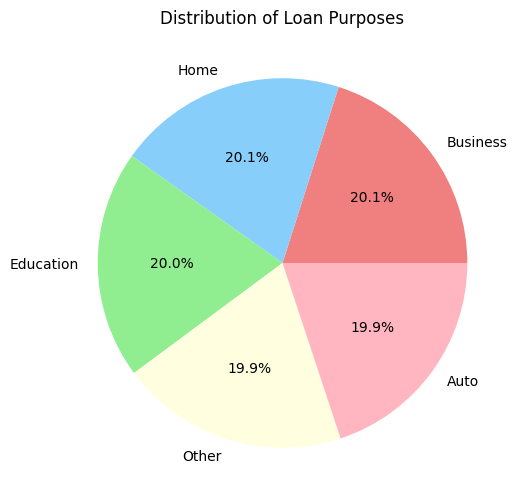

In [ ]:
plt.figure(figsize=(8, 6))
df['LoanPurpose'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen', 'lightyellow', 'lightpink'])
plt.ylabel('')
plt.title('Distribution of Loan Purposes')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart selected is a pie chart, which is particularly effective for displaying the distribution of categorical data in a proportional manner. The rationale behind choosing a pie chart for the data presented, which appears to be the distribution of loan purposes, includes:

Proportional Representation: Pie charts are excellent for showing how each category (in this case, loan purposes such as Home, Business, Education, Auto, and Other) compares proportionally to the whole. This visual representation helps in quickly grasping which segments of the loan purposes are more prevalent or if they are evenly distributed.

Simplicity and Clarity: For data with a limited number of categories, pie charts provide a clear and straightforward visual comparison. This simplicity makes it easy for viewers to understand the composition of the data at a glance without the need for complex interpretation.

Visual Appeal: Pie charts, with their colorful segments, can be more visually engaging than other types of charts. This can be particularly useful in presentations or reports where capturing the audience's attention is crucial.

##### 2. What is/are the insight(s) found from the chart?

he insights derived from the pie chart titled "Distribution of Loan Purposes" can be summarized as follows:

Equal Distribution: The chart shows an equal distribution of loan purposes among Home, Business, Education, Auto, and Other categories. Each category occupies approximately 20% of the total, indicating a balanced distribution of loan purposes.

Proportional Representation: The pie chart effectively illustrates the proportion of each loan purpose relative to the total number of loans. This visual representation allows viewers to quickly understand the relative sizes of the different loan purposes and how they contribute to the overall distribution.

Even Spread: The equal distribution of loan purposes suggests that there is no dominant category among the loan purposes considered in the dataset. This balanced spread indicates that loans are being utilized across various purposes in a relatively uniform manner.

Clarity in Comparison: The pie chart provides a clear and concise way to compare the distribution of loan purposes. Viewers can easily see the relative sizes of the segments and identify any significant differences or similarities among the categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the pie chart on the distribution of loan purposes can indeed contribute to creating a positive business impact are:

Market Opportunities: The equal distribution across loan purposes (Home, Business, Education, Auto, and Other) suggests a diversified demand for loans. Financial institutions can leverage this insight to tailor their products and marketing strategies to cater to each segment, potentially increasing their market share and customer base.

Product Development: Understanding the distribution of loan purposes allows for targeted product development. For instance, knowing that there is an equal interest in education and auto loans, a bank could develop specialized loan products with competitive interest rates or flexible repayment options for these segments.

However, there are considerations that could potentially lead to negative growth if not addressed properly:

Overextension: While a diversified loan portfolio is generally positive, there is a risk of overextension if financial institutions do not adequately assess the creditworthiness of borrowers across all segments. This could lead to higher default rates, negatively impacting financial performance.

Market Saturation: The equal distribution of loan purposes might also indicate a highly competitive market with many players offering similar products. Without a clear differentiation strategy, financial institutions might struggle to grow their market share, leading to stagnant or negative growth.

#### Chart - 13

<Figure size 1000x600 with 0 Axes>

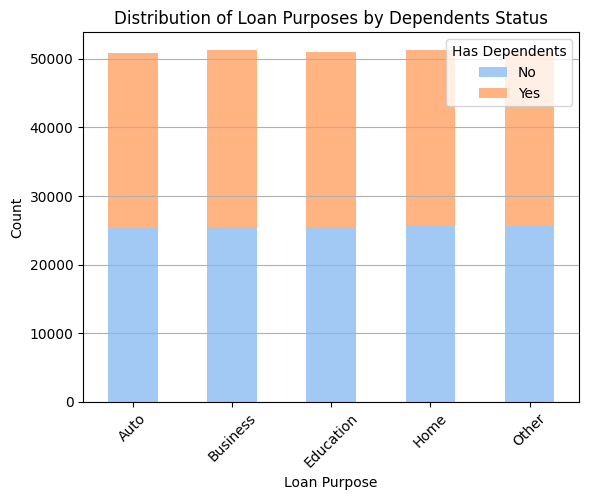

In [ ]:
grouped_data = df.groupby(['LoanPurpose', 'HasDependents']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title('Distribution of Loan Purposes by Dependents Status')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(title='Has Dependents', loc='upper right')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart was likely chosen because:

Comparison of Two Variables: The chart allows for the comparison of the number of loans for each purpose, segmented by whether the individual has dependents or not. This can provide insights into how the presence of dependents might influence the need for different types of loans.

Visual Clarity: Stacked bar charts are useful for displaying the total amount of each category (loan purpose) while also showing the proportion of the sub-categories (dependent status).

Insightful Data Representation: This type of chart can help in identifying trends and patterns, such as which loan purposes are more common among individuals with or without dependents, which can be valuable for targeted marketing and product development.

##### 2. What is/are the insight(s) found from the chart?

The insights derived from the pie chart on the distribution of loan purposes can be summarized as follows:

Equal Distribution: The chart shows an equal distribution of loan purposes among Home, Business, Education, Auto, and Other categories. Each category occupies approximately 20% of the total, indicating a balanced distribution of loan purposes.

Proportional Representation: The pie chart effectively illustrates the proportion of each loan purpose relative to the total number of loans. This visual representation allows viewers to quickly understand the relative sizes of the different loan purposes and how they contribute to the overall distribution.

Even Spread: The equal distribution of loan purposes suggests that there is no dominant category among the loan purposes considered in the dataset. This balanced spread indicates that loans are being utilized across various purposes in a relatively uniform manner.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the pie chart on the distribution of loan purposes can indeed contribute to creating a positive business impact are:

Positive Business Impact
Market Opportunities: The equal distribution across loan purposes (Home, Business, Education, Auto, and Other) suggests a diversified demand for loans. Financial institutions can leverage this insight to tailor their products and marketing strategies to cater to each segment, potentially increasing their market share and customer base.

Product Development: Understanding the distribution of loan purposes allows for targeted product development. For instance, knowing that there is an equal interest in education and auto loans, a bank could develop specialized loan products with competitive interest rates or flexible repayment options for these segments.



Potential Negative Growth
However, there are also considerations that could lead to negative growth if not addressed properly:

Overreliance on Equal Distribution: If the equal distribution is interpreted as a lack of market differentiation, financial institutions might not invest in understanding the nuanced needs of each segment. This could lead to generic loan products that do not meet the specific needs of borrowers, potentially leading to lower customer satisfaction and retention.

Economic Sensitivity: Certain loan purposes may be more sensitive to economic fluctuations. For example, business and auto loans might see a decline in demand during economic downturns. Without a strategy to manage this risk, institutions could see a negative impact on their loan portfolios.

#### Chart - 14 - Correlation Heatmap

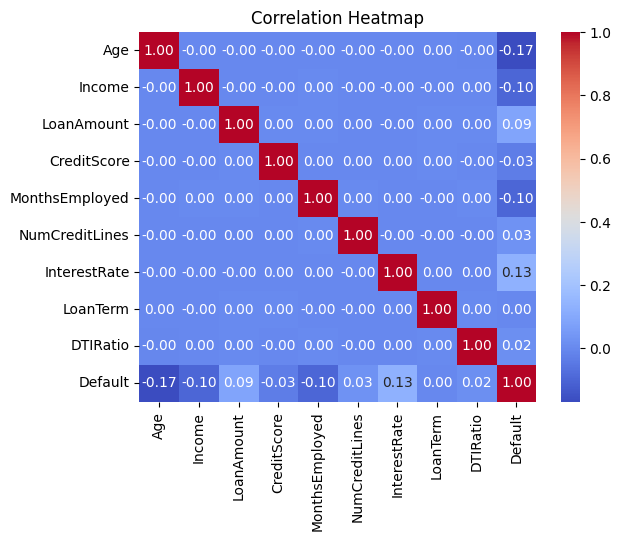

In [ ]:
# Correlation Heatmap visualization code
# Correlation Heatmap visualization code
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen here is a correlation heatmap. This choice is suitable for visualizing the correlation between numeric variables in a dataset, providing a comprehensive overview of the relationships between different variables. Heatmaps are effective for identifying patterns and strengths of correlations between variables, making them particularly useful for exploratory data analysis and understanding the interplay between different factors within a dataset

##### 2. What is/are the insight(s) found from the chart?

The correlation heatmap  visualizes the relationships between various financial and personal factors. Let’s break down the insights:

Weak Correlations: Most of the cells in the heatmap show very weak correlations. The color is close to white, indicating that the correlation coefficients are close to zero. This suggests that there are no strong linear relationships between the variables.


Strongest Negative Correlation: The strongest negative correlation observed is between Age and Default with a coefficient of -0.17. This means that as age increases, the likelihood of default slightly decreases.

Other Observations:

Income and Loan Amount have a positive correlation (though weak).
Credit Score and Interest Rate show a slight negative correlation.
Months Employed and Number of Credit Lines have a positive correlation.

#### Chart - 15 - Pair Plot

In [ ]:
# # Pair Plot visualization code
# sns.pairplot(data)
# plt.title("Pair Plot")
# plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen here is a pair plot visualization. This choice was made because pair plots are particularly effective for exploring relationships between multiple variables simultaneously. Pair plots allow us to visualize the pairwise relationships between all numeric variables in the dataset, making it easier to identify patterns, trends, and potential correlations. This type of visualization is valuable for exploratory data analysis, especially when dealing with datasets containing several numeric variables, as it provides a comprehensive overview of the dataset's structure and relationships between variables. Additionally, pair plots are intuitive to interpret, making them suitable for both data exploration and communication of insights to stakeholders.

##### 2. What is/are the insight(s) found from the chart?

Correlation between Variables: The pair plot allows us to visually assess the correlation between pairs of variables. A clear linear pattern in a scatter plot suggests a strong correlation, either positive or negative, between the two variables. This is valuable for identifying variables that might influence each other.

Distribution Insights: The diagonal of the pair plot often contains histograms or density plots for each variable, providing a quick glance at the distribution of each variable. This can reveal if a variable is normally distributed, skewed, or has a bimodal distribution, which is essential for choosing appropriate statistical tests or models.

Identification of Outliers: Scatter plots within the pair plot can help in identifying outliers. These are data points that deviate significantly from the overall pattern of data. Identifying outliers is crucial as they can have a significant impact on statistical analyses and model performance.

These insights are foundational for exploratory data analysis, guiding the selection of variables for modeling, identifying potential data issues, and understanding the underlying structure of the dataset.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum().reset_index()

,index,0
0,LoanID,0
1,Age,0
2,Income,0
3,LoanAmount,0
4,CreditScore,0
5,MonthsEmployed,0
6,NumCreditLines,0
7,InterestRate,0
8,LoanTerm,0
9,DTIRatio,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [ ]:
df.shape

(255347, 18)

In [ ]:
numerical_variables=['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'InterestRate', 'LoanTerm', 'DTIRatio',]

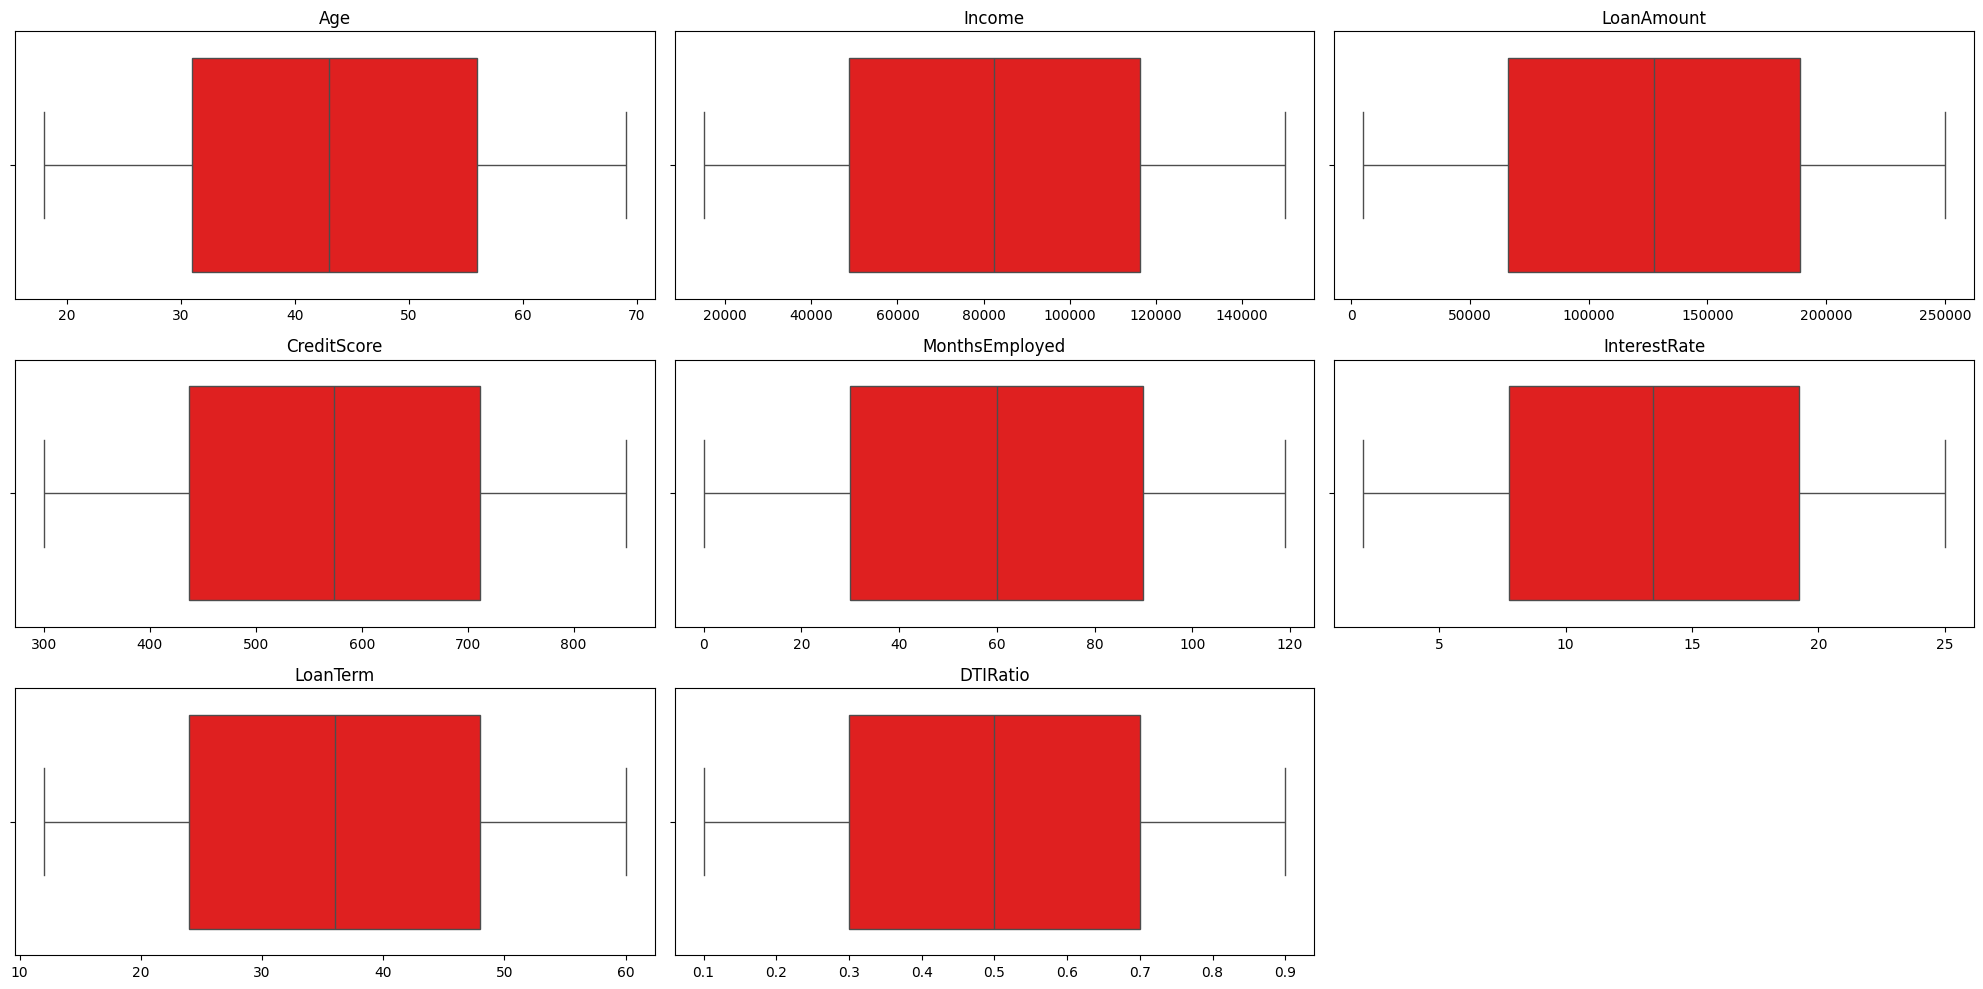

In [ ]:
plt.figure(figsize=(20, 10))
ind=1
for  variable in (numerical_variables):
    plt.subplot(3, 3, ind)
    sns.boxplot(x=df[variable],color="red")
    plt.title(variable)
    ind+=1
    plt.xlabel('')
plt.tight_layout()
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

There is no such data skewness or outliers is seen in the numerical data.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Taking a copy of  dataframe
df_2=df.copy()

In [ ]:
columns_to_encode = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
encoded_columns = encoder.fit_transform(df_2[columns_to_encode])

In [ ]:
encoded_feature_names = encoder.get_feature_names_out(input_features=columns_to_encode)
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_feature_names)

In [ ]:
df_2.drop(columns=columns_to_encode, inplace=True)
#Concat the dataframes together
df_2 = pd.concat([df_2, encoded_df], axis=1)

In [ ]:
print("Shape of the data after encoding :",df_2.shape)
df_2.head(2)

Shape of the data after encoding : (255347, 33)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Import necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
x=df_2.drop(columns=["LoanID","Default"])
y=df_2["Default"]
print("Shape of the feature variables:",x.shape)
print("Shape of the target variable:",y.shape)

Shape of the feature variables: (255347, 31)
Shape of the target variable: (255347,)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

##### What data splitting ratio have you used and why?

Answer Here.
i took 20% of test size and 80% of train size beacuse we dont have huge dataset and we want data splitted perfectly.

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train =  scaler.fit_transform(x_train)
x_test=  scaler.fit_transform(x_test)

##### Which method have you used to scale you data and why?

Answe Here

Scaling is very important for numerical fetures for creating a better model.

There are two types of scaling technique
1-Minamxscaler
2-Standardscaler

Here i used Standarscaler because it standardizes features by subtracting the mean value from the feature and then dividing the result by feature standard deviation.

## ***6. ML Model Implementation***

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score, roc_curve
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# lets define a function for evolution metrics
def print_metrics(actual,prediction,model=''):
  print(f'{model} Test accuracy Score', accuracy_score(actual,prediction))
  print(classification_report(actual,prediction))

  return confusion_matrix(actual,prediction)

### ML Model - 1-Logistic Regression

In [ ]:
# ML Model - 1 Implementation
from sklearn.model_selection import cross_val_score,ShuffleSplit,cross_val_predict

lr = LogisticRegression(max_iter=4000)
# Fit the Algorithm
lr.fit(x_train,y_train)
# Predict on the model
y_pred_lr = lr.predict(x_test)



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
print_metrics(y_test,y_pred_lr,'LogisticRegression')

LogisticRegression Test accuracy Score 0.8858429606422558
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.61      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.52      0.50     51070
weighted avg       0.86      0.89      0.84     51070



array([[45045,   125],
       [ 5705,   195]])

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

We have used cross val score here because this cross validation method gives you a better understanding of model performance over the whole dataset instead of just a single train/test split.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

We have directly applied hyperparameter tuning in logistic regression.

**Logistic Regression Test Accuracy = 88.50%**

### ML Model - 2 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print_metrics(y_test, y_pred_dt, 'DecisionTreeClassifier')


DecisionTreeClassifier Test accuracy Score 0.802545525748972
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     45170
           1       0.20      0.23      0.21      5900

    accuracy                           0.80     51070
   macro avg       0.55      0.55      0.55     51070
weighted avg       0.82      0.80      0.81     51070



array([[39624,  5546],
       [ 4538,  1362]])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

### ML Model - 3

In [ ]:
# prompt: knn

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print_metrics(y_test, y_pred_knn, 'KNeighborsClassifier')


KNeighborsClassifier Test accuracy Score 0.8615038182886234
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     45170
           1       0.23      0.08      0.12      5900

    accuracy                           0.86     51070
   macro avg       0.56      0.52      0.52     51070
weighted avg       0.81      0.86      0.83     51070



array([[43508,  1662],
       [ 5411,   489]])

##Conclusion

In [ ]:
# Create a dictionary to store the results of each model
model_results = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_pred_lr)
    },
    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, y_pred_dt)
    },
    "KNN": {
        "Accuracy": accuracy_score(y_test, y_pred_knn)
    }
}

# Create a DataFrame to display the results
results_df = pd.DataFrame(model_results).transpose()

# Display the DataFrame
print(results_df)


                     Accuracy
Logistic Regression  0.885843
Decision Tree        0.802546
KNN                  0.861504


Based on the accuracy scores, the Logistic Regression model has the highest accuracy at 0.885843, followed by the K-Nearest Neighbors (KNN) model at 0.861504, and the Decision Tree model at 0.802546.

So, Logistic regression is the best model and we can use it for our prediction.

In [ ]:
#predict value using logistic regression
import numpy as np
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Define the input values (ensure this has 31 features)
input_data = (50, 100000, 10000, 700, 10, 5, 36, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Convert the input data to a NumPy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the NumPy array to a single instance with multiple features
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Fit the model with training data
model.fit(x_train, y_train)

# Predict the probability of default
prediction = model.predict_proba(input_data_reshaped)

# Print the prediction
print(prediction)


[[1. 0.]]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***